In [1]:
import mantis as mt
import math
import mudata as mu
import pandas as pd
import anndata as ad
import numpy as np

In [2]:
# mdata = mt.io.load_data(coords= "data/V11L12-038_A1_spot_coordinates.csv", m_file="data/msi_norm_hvg.csv", g_file = "data/rna_norm_hvg.csv", region="data/RegionLoupe.csv")
mdata = mt.io.load_data(mdata = "data/test.h5mu")

In [3]:
mdata

MuData object with n_obs × n_vars = 2386 × 2000
  obs:	'region'
  uns:	'bin_index', 'celltype_metabolite', 'celltype_metabolite_per_ct', 'mcmc_order', 'mcmc_snapshots', 'regional_metabolite', 'regional_metabolite_fit', 'spatvar_metabolite', 'spatvar_metabolite_celltype', 'spatvar_metabolite_celltype_coef', 'spatvar_metabolite_celltype_summary', 'spatvar_metabolite_combined', 'spatvar_metabolite_region', 'spc_ct', 'spc_ct_results', 'spc_sd'
  obsm:	'cell_type', 'region', 'spatial'
  3 modalities
    gene:	2386 x 1000
    metabolite:	2386 x 500
    metabolites_sampled:	2386 x 500

In [5]:
# df_ct = pd.read_csv("data/cell_types.csv", index_col=0)
# mdata.obsm['cell_type'] = df_ct

In [6]:
# raw_df = pd.read_csv("/storage/project/r-ssinha338-0/shared/MANTIS/data/msi_df_hvg.csv", index_col=0)
# common_idx = mdata.obs_names.values
# common_idx = set(common_idx).intersection(raw_df.index)
# raw_df = raw_df.reindex(mdata.obs_names.values)
# mdata.uns["metabolite_raw"] = ad.AnnData(
#             X=raw_df.to_numpy(dtype=float),
#             obs=pd.DataFrame(index=mdata.obs_names.values),
#             var=pd.DataFrame(index=mdata.mod["metabolite"].var_names)
#         )

In [7]:
# X_rearranged = raw_df.values[mdata.uns['mcmc_order'].values, np.arange(mdata.uns['mcmc_order'].values.shape[1])]

In [8]:
# mdata.uns["metabolite_null"] = ad.AnnData(
#             X=X_rearranged,
#             obs=pd.DataFrame(index=mdata.obs_names.values),
#             var=pd.DataFrame(index=mdata.mod["metabolite"].var_names)
#         )

In [3]:
# dmin = math.sqrt(2.0)
# l = 4 * dmin

# mdata, G = mt.tl.sample(mdata, l = l)

[done] 136.06234 | seed=10 | accepted=9637
[done] 146.16571 | seed=11 | accepted=8364
[done] 146.982305 | seed=12 | accepted=9189
[done] 162.11258500000002 | seed=13 | accepted=9658
[done] 162.11293999999998 | seed=14 | accepted=9627
[done] 163.11623 | seed=15 | accepted=9317
[done] 165.066415 | seed=16 | accepted=9151
[done] 170.08429999999998 | seed=17 | accepted=8984
[done] 172.00115499999998 | seed=18 | accepted=8858
[done] 184.094885 | seed=19 | accepted=9203
[done] 190.911915 | seed=20 | accepted=8814
[done] 190.912325 | seed=21 | accepted=8906
[done] 192.91047500000002 | seed=22 | accepted=9048
[done] 193.98302999999999 | seed=23 | accepted=8912
[done] 195.09167000000002 | seed=24 | accepted=8877
[done] 195.09231 | seed=25 | accepted=8950
[done] 196.09551 | seed=26 | accepted=8740
[done] 197.10765 | seed=27 | accepted=8923
[done] 198.089485 | seed=28 | accepted=8849
[done] 200.068365 | seed=29 | accepted=9021
[done] 200.068855 | seed=30 | accepted=9217
[done] 203.05299000000002 

In [7]:
mdata = mt.tl.compute_regional_metabolite(mdata, alpha = 0.1)

Best fit distribution for KL null: gengamma with params (np.float64(7.441201509478347), np.float64(0.2848373522695069), 0.0, np.float64(1.1204484766926887e-05))
Parametric significant (BH q < 0.1) = 81 (16.20%)


In [4]:
mdata = mt.tl.compute_celltype_metabolite(mdata)

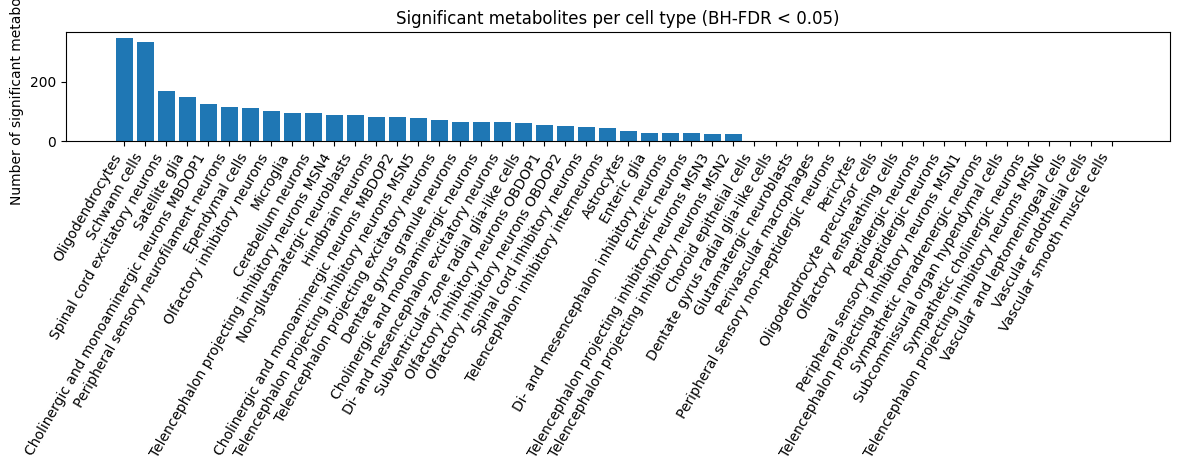

In [6]:
import matplotlib.pyplot as plt

all_cts = mdata.uns['celltype_metabolite']["cell_type"].unique()
sig_counts = (mdata.uns['celltype_metabolite'].assign(significant=mdata.uns['celltype_metabolite']["significant"].astype(bool))
                      .groupby("cell_type")["significant"]
                      .sum()
                      .reindex(all_cts, fill_value=0)
                      .sort_values(ascending=False)
                      .astype(int))

plt.figure(figsize=(12, 4.8))
x = range(len(sig_counts))
plt.bar(x, sig_counts.values)
plt.xticks(x, sig_counts.index, rotation=60, ha="right")
plt.ylabel("Number of significant metabolites")
plt.title("Significant metabolites per cell type (BH-FDR < 0.05)")
plt.tight_layout()
plt.show()

In [3]:
mdata = mt.tl.spatvar_metabolite(mdata)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.4s finished


In [1]:
import mantis as mt
import math
import mudata as mu
import pandas as pd
import anndata as ad
import numpy as np
# mdata = mt.io.load_data(coords= "data/V11L12-038_A1_spot_coordinates.csv", m_file="data/msi_norm_hvg.csv", g_file = "data/rna_norm_hvg.csv", region="data/RegionLoupe.csv")
mdata = mt.io.load_data(mdata = "data/test.h5mu")

In [2]:
df_bin = pd.read_csv("data/bin_index.csv")

In [3]:
mdata.uns['bin_index'] = df_bin.copy()

In [4]:
mdata = mt.tl.spc_ct(mdata)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 926 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
/storage/project/r-ssinha338-0/shared/MANTIS/mantis/tools/_spc.py:339: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  sci

[INFO] metabolites total=500, with usable NULL=500


In [5]:
mdata = mt.tl.spc_sd(mdata)

In [8]:
mdata.write_h5mu("data/test.h5mu")

# add

In [9]:
gene_df = pd.read_csv("/storage/project/r-ssinha338-0/shared/MANTIS/data/rna_norm_hvg.csv", index_col=0)

In [10]:
common_idx = mdata.obs_names.values
common_idx = set(common_idx).intersection(gene_df.index)

In [11]:
gene_df = gene_df.loc[mdata.obs_names.values]

In [13]:
mdata.mod["gene"] = ad.AnnData(
            X=gene_df.to_numpy(dtype=float),
            obs=pd.DataFrame(index=mdata.obs_names.values),
            var=pd.DataFrame(index=gene_df.columns)
        )

In [14]:
region_df = pd.read_csv("/storage/project/r-ssinha338-0/shared/MANTIS/data/RegionLoupe.csv", index_col=0)
region_df.index = [f"{x}_1" for x in region_df.index.values]
region_df = region_df.fillna("unknown").astype(str)
mdata.obs["region"] = region_df.loc[mdata.obs_names.values]

In [15]:
mdata.write_h5mu("data/test2.h5mu")

In [32]:
import numpy as np
np.isnan(mdata['gene'].to_df().values).any()

np.False_

In [16]:
mdata = mt.io.load_data(mdata = "data/test2.h5mu")

In [12]:
df_ct.loc[mdata.obs_names.values].to_csv("data/cell_types.csv")

In [21]:
import h5py
with h5py.File("data/test.h5mu", "r") as f:
    print("Modalities:", list(f["mod"].keys()))

Modalities: ['gene', 'metabolite', 'metabolites_sampled']


In [1]:
import mantis as mt
import math
import mudata as mu
import pandas as pd
import anndata as ad
mdata = mt.io.load_data(coords= "data/V11L12-038_A1_spot_coordinates.csv", m_file="data/msi_norm_hvg.csv", g_file = "data/rna_norm_hvg.csv", region="data/RegionLoupe.csv")
# mdata = mt.io.load_data(mdata = "data/test.h5mu")

In [2]:
df_ct = pd.read_csv("data/cell_types.csv", index_col=0)
mdata.obsm['cell_type'] = df_ct

In [36]:
gene_df = pd.read_csv("/storage/project/r-ssinha338-0/shared/MANTIS/data/msi_df_hvg.csv", index_col=0)
common_idx = mdata.obs_names.values
common_idx = set(common_idx).intersection(gene_df.index)
gene_df = gene_df.loc[mdata.obs_names.values]
mdata.mod["metabolite_raw"] = ad.AnnData(
            X=gene_df.to_numpy(dtype=float),
            obs=pd.DataFrame(index=mdata.obs_names.values),
            var=pd.DataFrame(index=gene_df.columns)
        )
gene_df = pd.read_csv("/storage/project/r-ssinha338-0/shared/MANTIS/data/msi_df_null.csv", index_col=0)
common_idx = mdata.obs_names.values
common_idx = set(common_idx).intersection(gene_df.index)
gene_df = gene_df.loc[mdata.obs_names.values]
mdata.mod["metabolite_null"] = ad.AnnData(
            X=gene_df.to_numpy(dtype=float),
            obs=pd.DataFrame(index=mdata.obs_names.values),
            var=pd.DataFrame(index=gene_df.columns)
        )

In [4]:
mdata = mt.tl.compute_regional_metabolite(mdata, alpha = 0.1)

Best fit distribution for KL null: geninvgauss with params (np.float64(0.11670163317913455), np.float64(0.29637958118018215), 0.0, np.float64(0.009293416054464241))
Parametric significant (BH q < 0.1) = 66 (13.20%)


In [5]:
mdata = mt.tl.compute_celltype_metabolite(mdata)

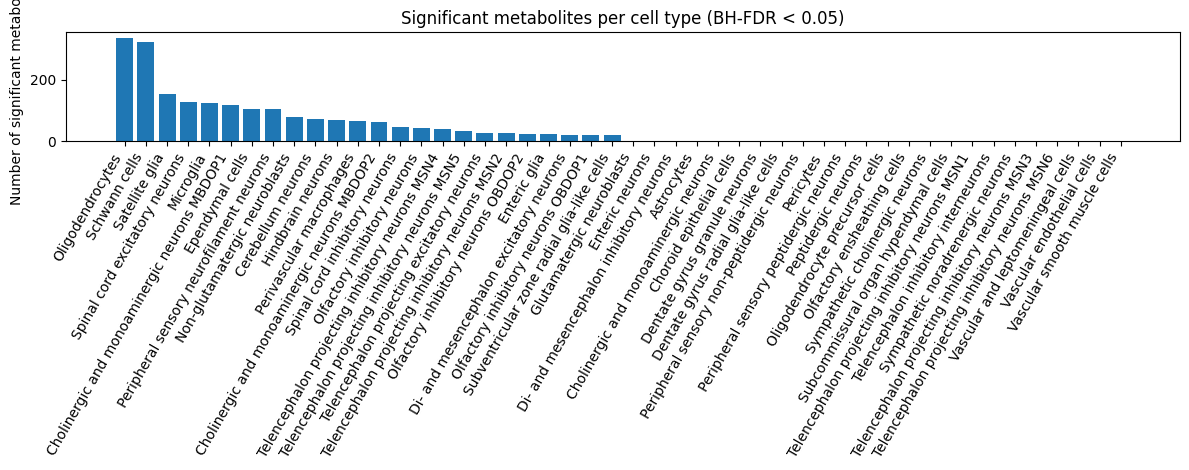

In [12]:
import matplotlib.pyplot as plt

all_cts = mdata.uns['celltype_metabolite']["cell_type"].unique()
sig_counts = (mdata.uns['celltype_metabolite'].assign(significant=mdata.uns['celltype_metabolite']["significant"].astype(bool))
                      .groupby("cell_type")["significant"]
                      .sum()
                      .reindex(all_cts, fill_value=0)
                      .sort_values(ascending=False)
                      .astype(int))

# sig_counts.to_csv("sig_metabolite_count_per_ct.csv", header=["n_significant"])

plt.figure(figsize=(12, 4.8))
x = range(len(sig_counts))
plt.bar(x, sig_counts.values)
plt.xticks(x, sig_counts.index, rotation=60, ha="right")
plt.ylabel("Number of significant metabolites")
plt.title("Significant metabolites per cell type (BH-FDR < 0.05)")
plt.tight_layout()
# plt.savefig("sig_metabolite_count_per_ct.png", dpi=200)
plt.show()